# (b) - Evaluating whether older planes suffer more delays on a year-to-year basis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plane_data = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/plane-data.csv',usecols = ['tailnum','year'])

In [3]:
df1 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2006.csv',usecols = ['TailNum','ArrDelay','DepDelay'])
df2 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2007.csv',usecols = ['TailNum','ArrDelay','DepDelay'])
main_dataset = pd.concat([df1,df2])
del df1, df2

In [4]:
main_dataset.head()

,TailNum,ArrDelay,DepDelay
0,N657AW,6.0,-2.0
1,N834AW,-5.0,0.0
2,N605AW,-23.0,0.0
3,N312AW,-8.0,-2.0
4,N309AW,0.0,-8.0


In [5]:
correlation = main_dataset['ArrDelay'].corr(main_dataset['DepDelay'])
correlation

0.9258279051569631

In [6]:
#Since we observe a high correlation between ArrDelay and DepDelay, we shall only consider DepDelay in this question
#Hence we will drop the ArrDelay column
main_dataset.drop(columns=['ArrDelay'], inplace=True)
main_dataset.head()

,TailNum,DepDelay
0,N657AW,-2.0
1,N834AW,0.0
2,N605AW,0.0
3,N312AW,-2.0
4,N309AW,-8.0


In [7]:
#Filtering for the records that have a positive DepDelay value, which implies they were delayed in departure
main_dataset = main_dataset[main_dataset['DepDelay'] > 0]

In [8]:
pd.isnull(main_dataset).sum(axis = 0)

TailNum     0
DepDelay    0
dtype: int64

In [9]:
pd.isnull(plane_data).sum(axis = 0)

tailnum      0
year       549
dtype: int64

In [10]:
#dropping null values
plane_data = plane_data.dropna (subset = ['year'])

In [11]:
pd.isnull(plane_data).sum(axis = 0)

tailnum    0
year       0
dtype: int64

In [12]:
plane_data.head()

,tailnum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998


In [13]:
#Checking for values of year to make sure that given year values are of proper form
plane_data.year.value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
None    145
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
0000      3
1973      3
1959      2
1963      2
1974      2
1970      2
1956      1
1972      1
1962      1
1957      1
1964      1
1965      1
1946      1
1966      1
1971      1
Name: year, dtype: int64

In [14]:
#To remove the 0000 and None records
plane_data = plane_data[plane_data['year'] != '0000']
plane_data = plane_data[plane_data['year'] != 'None']

In [15]:
plane_data.year.value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
1973      3
1970      2
1974      2
1963      2
1959      2
1966      1
1946      1
1964      1
1972      1
1962      1
1956      1
1957      1
1965      1
1971      1
Name: year, dtype: int64

In [16]:
#Modifying the column name of tailnum in plane_data to TailNum, so inner merge can take place
plane_data = plane_data.rename(columns = {'tailnum': 'TailNum'})

In [17]:
plane_data.head()

,TailNum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998


In [18]:
Main_df = main = pd.merge(main_dataset, plane_data, on = 'TailNum', how = 'inner')

In [19]:
Main_df

,TailNum,DepDelay,year
0,N425US,1.0,1989
1,N425US,1.0,1989
2,N425US,33.0,1989
3,N425US,22.0,1989
4,N425US,42.0,1989
...,...,...,...
4857487,N665JB,4.0,2007
4857488,N665JB,37.0,2007
4857489,N665JB,11.0,2007
4857490,N665JB,3.0,2007


In [20]:
Main_df.dtypes 

TailNum      object
DepDelay    float64
year         object
dtype: object

In [21]:
Main_df['year'] = Main_df['year'].astype(int)

In [22]:
#Now grouping the departure delays by the year the plane was manufactured in, and obtaining mean of departure delay
MeanDelay_by_year = Main_df.groupby('year')['DepDelay'].mean()
MeanDelay_by_year

year
1956    34.962963
1957    24.755287
1959    36.471236
1962    35.309701
1963    37.601979
1964    36.340070
1965    39.590099
1966    44.778511
1967    34.633519
1968    33.608138
1969    33.494700
1970    34.903712
1971    35.320799
1972    33.188073
1973    33.247765
1974    36.603906
1975    34.196799
1976    31.099636
1977    31.700242
1978    28.896320
1979    32.483796
1980    33.995660
1982    32.374821
1983    32.098233
1984    28.224443
1985    26.538504
1986    29.125380
1987    30.517505
1988    30.489588
1989    29.110906
1990    29.468982
1991    31.173906
1992    30.431570
1993    29.885110
1994    31.020126
1995    27.846065
1996    30.844365
1997    35.330634
1998    31.775816
1999    32.325946
2000    31.376333
2001    30.560835
2002    33.247913
2003    33.786374
2004    30.931356
2005    31.056623
2006    29.170853
2007    26.933506
Name: DepDelay, dtype: float64

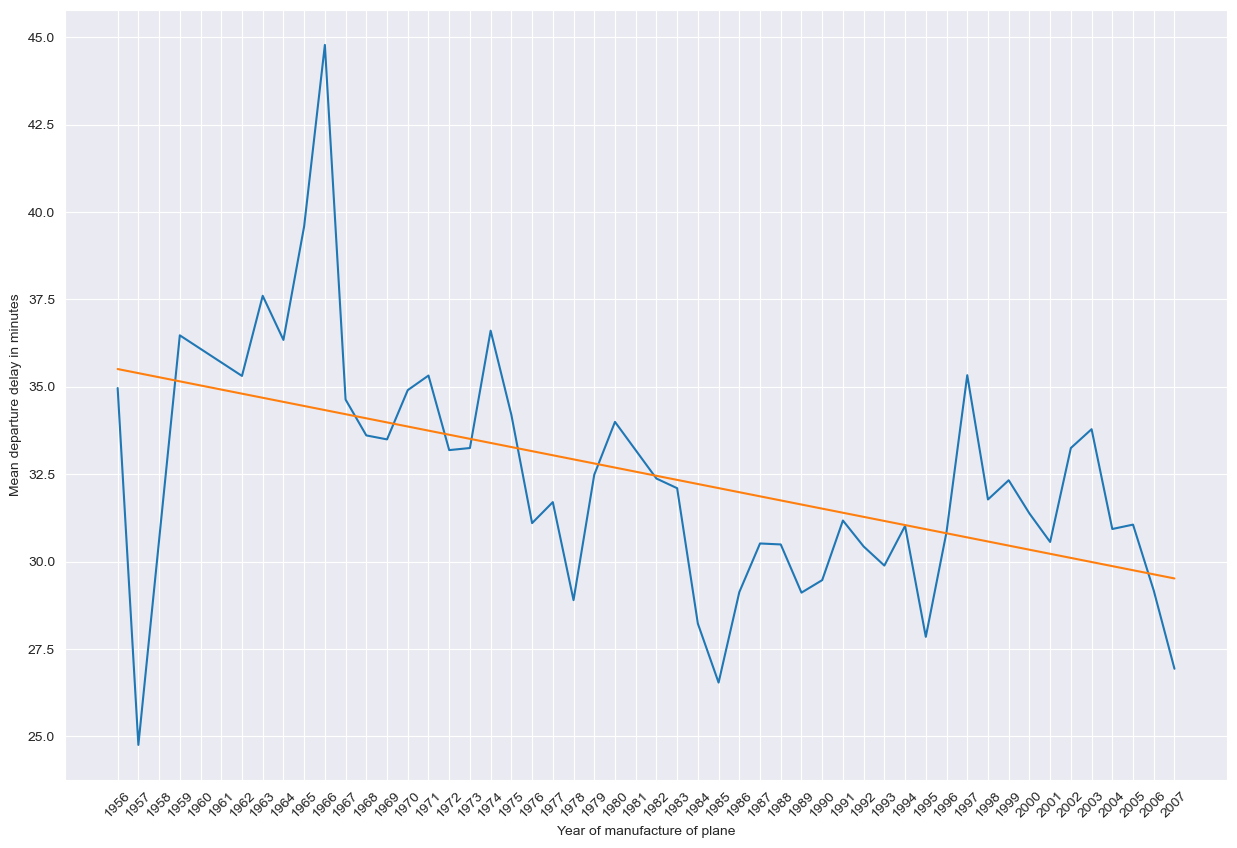

In [25]:
#Plotting a line graph to show the manufacture year of plane against the mean departure delay
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (15, 10))
plt.xticks(np.arange(min(MeanDelay_by_year.index), max(MeanDelay_by_year.index)+1, 1.0), rotation = 45)
ax.set(xlabel = "Year of manufacture of plane", ylabel = "Mean departure delay in minutes")
sns.lineplot(ax=ax, x = MeanDelay_by_year.index, y = MeanDelay_by_year.values)


trend = np.poly1d(np.polyfit(MeanDelay_by_year.index, MeanDelay_by_year.values, 1))
plt.plot(MeanDelay_by_year.index,trend(MeanDelay_by_year.index))